<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CH1" data-toc-modified-id="CH1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CH1</a></span><ul class="toc-item"><li><span><a href="#Misc-Examples" data-toc-modified-id="Misc-Examples-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Misc Examples</a></span><ul class="toc-item"><li><span><a href="#Marble-Example" data-toc-modified-id="Marble-Example-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Marble Example</a></span></li><li><span><a href="#Globe-Example" data-toc-modified-id="Globe-Example-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Globe Example</a></span></li></ul></li><li><span><a href="#Numerical-Techniques-to-approximate-Bayes-Theorem" data-toc-modified-id="Numerical-Techniques-to-approximate-Bayes-Theorem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Numerical Techniques to approximate Bayes Theorem</a></span><ul class="toc-item"><li><span><a href="#Grid-Approximation" data-toc-modified-id="Grid-Approximation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Grid Approximation</a></span></li><li><span><a href="#Quadratic-approximation" data-toc-modified-id="Quadratic-approximation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Quadratic approximation</a></span></li></ul></li></ul></li><li><span><a href="#CH2" data-toc-modified-id="CH2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CH2</a></span><ul class="toc-item"><li><span><a href="#The-garden-of-forking-data" data-toc-modified-id="The-garden-of-forking-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The garden of forking data</a></span></li><li><span><a href="#Building-a-model" data-toc-modified-id="Building-a-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Building a model</a></span></li><li><span><a href="#Components-of-the-model" data-toc-modified-id="Components-of-the-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Components of the model</a></span></li><li><span><a href="#Making-the-model-go" data-toc-modified-id="Making-the-model-go-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Making the model go</a></span></li><li><span><a href="#Practice-Problems" data-toc-modified-id="Practice-Problems-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><font color="purple">Practice Problems</font></a></span><ul class="toc-item"><li><span><a href="#EASY" data-toc-modified-id="EASY-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span><strong>EASY</strong></a></span></li><li><span><a href="#Medium" data-toc-modified-id="Medium-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Medium</a></span></li><li><span><a href="#Hard" data-toc-modified-id="Hard-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Hard</a></span></li></ul></li></ul></li><li><span><a href="#HOMEWORK-WEEK-1" data-toc-modified-id="HOMEWORK-WEEK-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>HOMEWORK WEEK 1</a></span></li></ul></div>

In [4]:
library(tidyverse)
library(rethinking)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.


Attaching package: 'rstan'


The following object is masked from 'package:tidyr':

    extract


Loading r

# CH1

## Misc Examples

### Marble Example

<img src='pics/SR_b12.png' alt='Drawing' style='width: 550pt'/>

### Globe Example

In [2]:
ways <- c( 0 , 3 , 8 , 9 , 0 )
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

The count of “water” observations w is distributed binomially, with probability p of “water” on each toss and n tosses in total. And the binomial distribution formula is built into R, so you can easily compute the likelihood of the data—six W’s in nine tosses—under any value of p with:


$Pr(w|n,p) = \frac{n!}{w!(n-w)}p^w(1-p)^(n-w)$

In [105]:
dbinom( 6 , size=9 , prob=0.5 ) 

[1] 0.1640625

That number is the relative number of ways to get six W’s, holding p at 0.5 and n at nine. So
it does the job of counting relative number of paths through the garden. Change the 0.5 to
any other value, to see how the value changes.

## Numerical Techniques to approximate Bayes Theorem

What this means is that various numerical techniques are needed to approximate the mathematics that follows from the definition of Bayes’ theorem. In this book, you’ll meet three different conditioning engines, numerical techniques for computing posterior distributions:

(1) Grid approximation

(2) Quadratic approximation

(3) Markov chain Monte Carlo (MCMC)



### Grid Approximation

One of the simplest conditioning techniques is grid approximation. While most parameters are continuous, capable of taking on an infinite number of values, it turns out that we can achieve an excellent approximation of the continuous posterior distribution by considering only a finite grid of parameter values. 

* At any particular value of a parameter, p′, it’s a simple matter to compute the posterior probability: just multiply the prior probability of p′ by the likelihood at p′. Repeating this procedure for each value in the grid generates an approximate picture of the exact posterior distribution. 
* This procedure is called grid approximation. In this section, you’ll see how to perform a grid approximation, using simple bits of R code.

**Grid approximation will mainly be useful as a pedagogical tool**, as learning it forces the user to really understand the nature of Bayesian updating. But in most of your real modeling, grid approximation isn’t practical. 
* The reason is that it scales very poorly, as the number of parameters increases. So in later chapters, grid approximation will fade away, to be replaced by other, more efficient techniques. Still, the conceptual value of this exercise will carry forward, as you graduate to other techniques.

In the context of the globe tossing problem, grid approximation works extremely well. So let’s build a grid approximation for the model we’ve constructed so far. Here is the recipe:
1.	Define the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid. 
2.	Compute the value of the prior at each parameter value on the grid.
3.	Compute the likelihood at each parameter value.
4.	Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood. 
5.	Finally, standardize the posterior, by dividing each value by the sum of all values.
In the globe tossing context, here’s the code to complete all five of these steps:


**<font color = 'purple'>In the globe tossing context, here’s the code to complete all five of these steps:</font>**

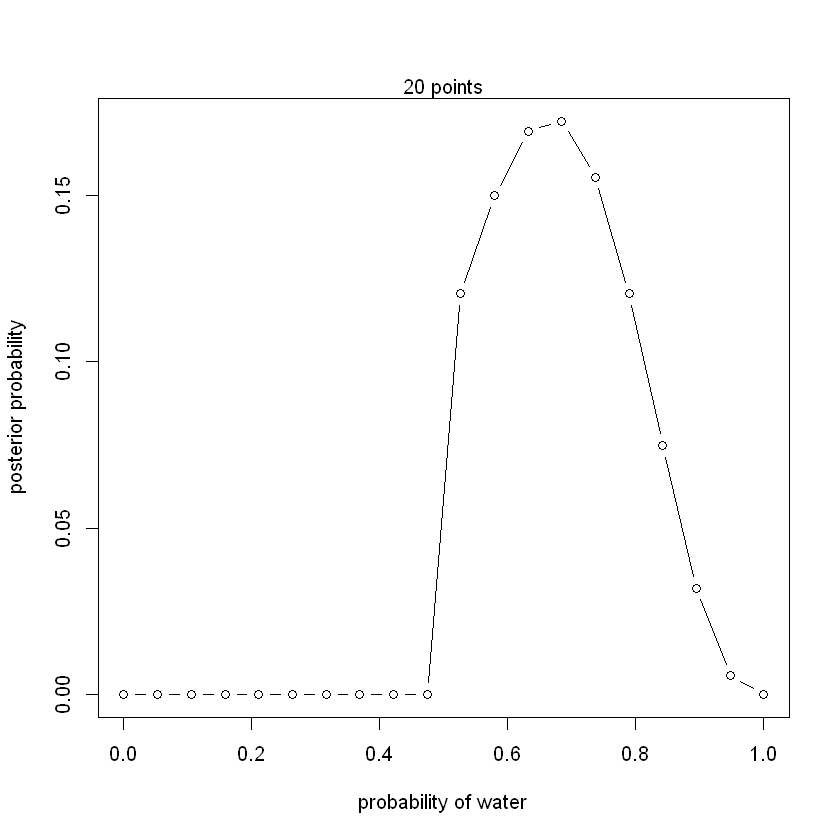

In [3]:
points = 20

# define grid
p_grid <- seq( from=0 , to=1 , length.out=points)
    # length.out=20 -> 20 intervals between 0 and 1

# define prior
# prior <- rep( 1 , points )
prior <- ifelse( p_grid < 0.5 , 0 , 1 )
# prior <- exp( -5*abs( p_grid - 0.5 ) )

# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

plot( p_grid , posterior , type="b" ,
     xlab="probability of water" , 
     ylab="posterior probability" )
mtext( "20 points" )

### Quadratic approximation

To compute the quadratic approximation to the globe tossing data:

In [54]:
library(rethinking)

Loading required package: rstan
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.

Attaching package: 'rstan'

The following object is masked from 'package:tidyr':

    extract

Loading required package: parallel
rethinking (Version 1.59)

Attaching package: 'rethinking'

The following object is masked from 'package:purrr':

    map



In [56]:
globe.qa <- map(
    alist(
        w ~ dbinom(9,p) , # binomial likelihood
        p ~ dunif(0,1)    # uniform prior
    ) ,
    data=list(w=6) )

# display summary of quadratic approximation
precis( globe.qa )

  Mean StdDev 5.5% 94.5%
p 0.67   0.16 0.42  0.92

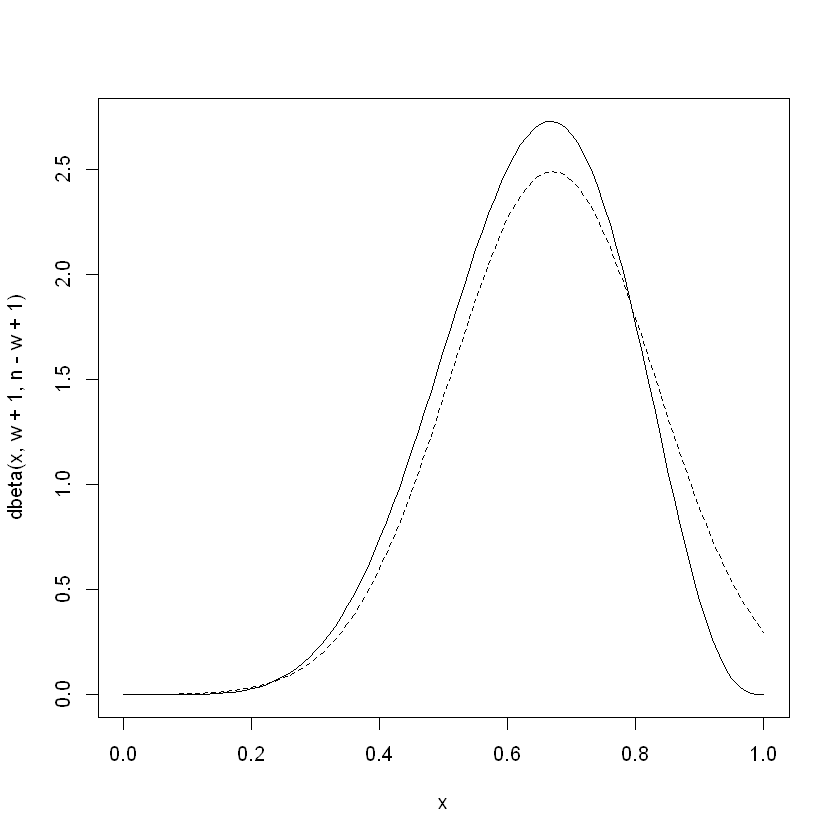

In [64]:
# analytical calculation 2
w <- 6
n <- 9
curve( dbeta( x , w+1 , n-w+1 ) , from=0 , to=1 )
# quadratic approximation
curve( dnorm( x , 0.67 , 0.16 ) , lty=2 , add=TRUE )

# CH2

## The garden of forking data

## Building a model

## Components of the model

In [2]:
dbinom( 6 , size=9 , prob=0.5 )

# compute the likelihood of the data—six W’s in nine tosses—
# with a p=0.5 chance of getting a W during any draw 


[1] 0.1640625

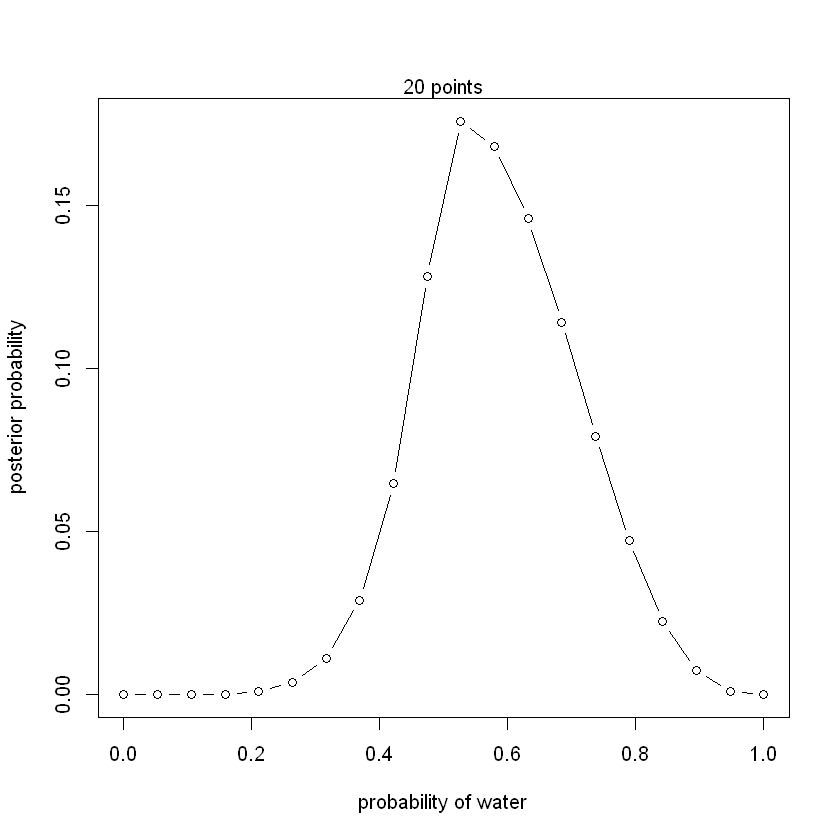

In [5]:
 # define grid
p_grid <- seq( from=0 , to=1 , length.out=20 )

# define prior
# prior <- rep( 1 , 20 )
# prior <- ifelse( p_grid < 0.5 , 0 , 1 ) 
prior <- exp( -5*abs( p_grid - 0.5 ) )

# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

plot( p_grid , posterior , type="b" ,
     xlab="probability of water" , ylab="posterior probability" )
mtext( "20 points" )

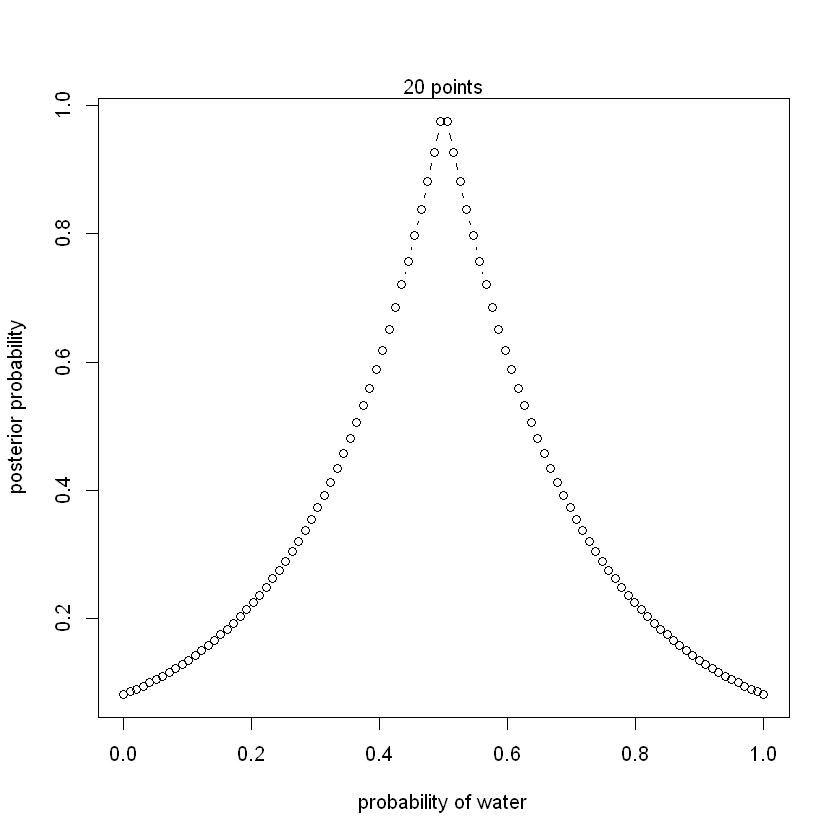

In [7]:
 # define grid
p_grid <- seq( from=0 , to=1 , length.out=100 )

# define prior
# prior <- rep( 1 , 20 )
# prior <- ifelse( p_grid < 0.5 , 0 , 1 ) 
prior <- exp( -5*abs( p_grid - 0.5 ) )

# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

plot( p_grid , prior , type="b" ,
     xlab="probability of water" , ylab="posterior probability" )
mtext( "20 points" )

In [9]:
globe.qa <- quap(
    alist(
        W ~ dbinom( W+L ,p) , # binomial likelihood
        p ~ dunif(0,1)        # uniform prior
    ) ,
    data=list(W=6,L=3) )

# display summary of quadratic approximation
precis( globe.qa )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
p,0.6666663,0.1571339,0.4155361,0.9177966


## Making the model go

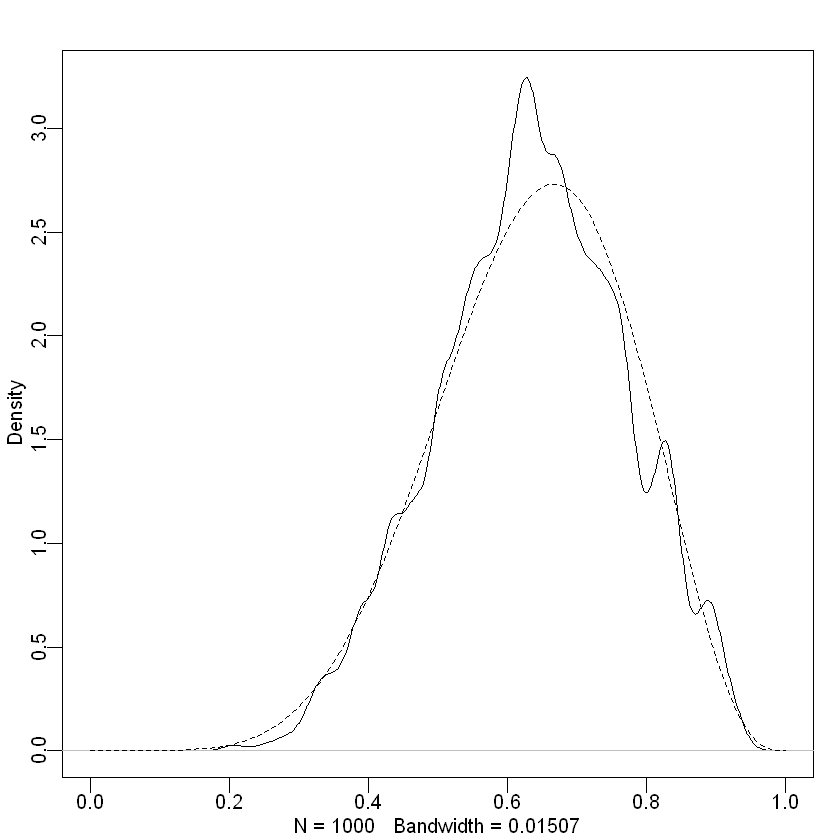

In [6]:
n_samples <- 1000 
p <- rep( NA , n_samples )
p[1] <- 0.5
W <- 6
L <- 3
for ( i in 2:n_samples ) {
    p_new <- rnorm( 1 , p[i-1] , 0.1 )
    if ( p_new < 0 ) p_new <- abs( p_new )
    if ( p_new > 1 ) p_new <- 2 - p_new
    q0 <- dbinom( W , W+L , p[i-1] )
    q1 <- dbinom( W , W+L , p_new )
    p[i] <- ifelse( runif(1) < q1/q0 , p_new , p[i-1] )
}
dens( p , xlim=c(0,1) )
curve( dbeta( x , W+1 , L+1 ) , lty=2 , add=TRUE )

## <font color = 'purple'>Practice Problems</font>

### **EASY**

### Medium

**<font color = 'purple'>2M1. Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p</font>**.

<font color = 'green'>dbinom() =
$Pr(w|n,p) = \frac{n!}{w!(n-w)}p^w(1-p)^(n-w)$</font>

In [12]:
compute_posterior <- function(w,n,prior,p=p_grid){
    likelihood               <- dbinom(x=w,size=n,prob=p)    
    unstandardized.posterior <- likelihood*prior
    return(unstandardized.posterior/sum(unstandardized.posterior))
}

plot_posterior <- function(x,y){
    plot(x=x,y=y,type='b',
        xlab="Probability of Water",
        ylab="Posterior Probability")
    title <- paste(length(x),"Points") 
    # paste <- Concatenate vectors after converting to character.
    mtext(title)
}

In [13]:
p_grid <- seq(from=0, to=1, length.out=20)
prior  <- rep(x=1, length=length(p_grid))

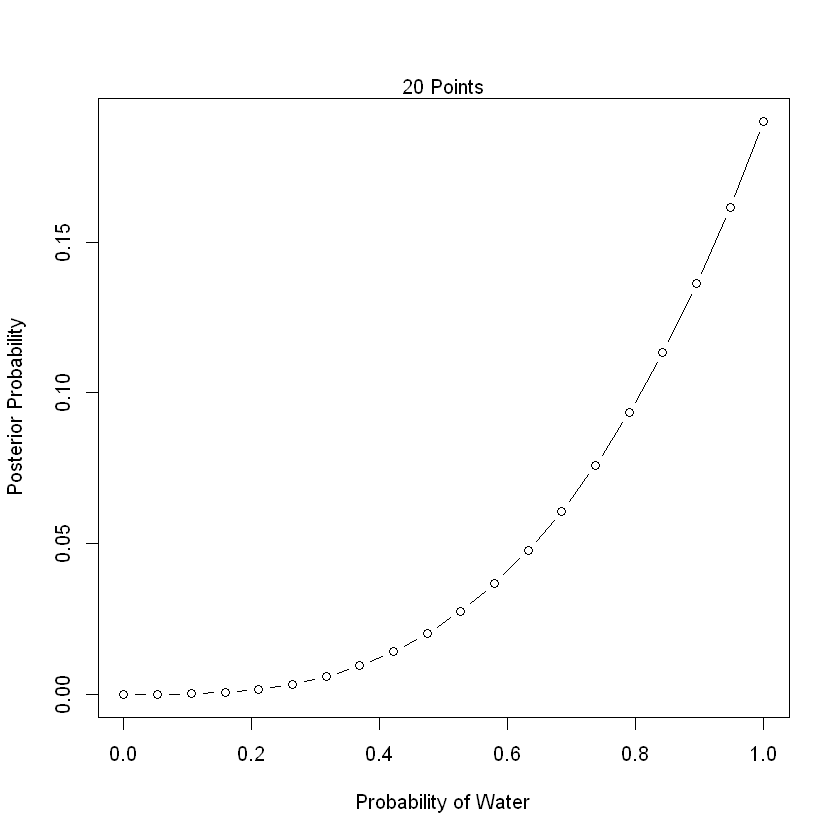

In [14]:
w <- 3; n <- 3
posterior <- compute_posterior(w=w, n=n, prior=prior)
plot_posterior(x=p_grid, y=posterior)

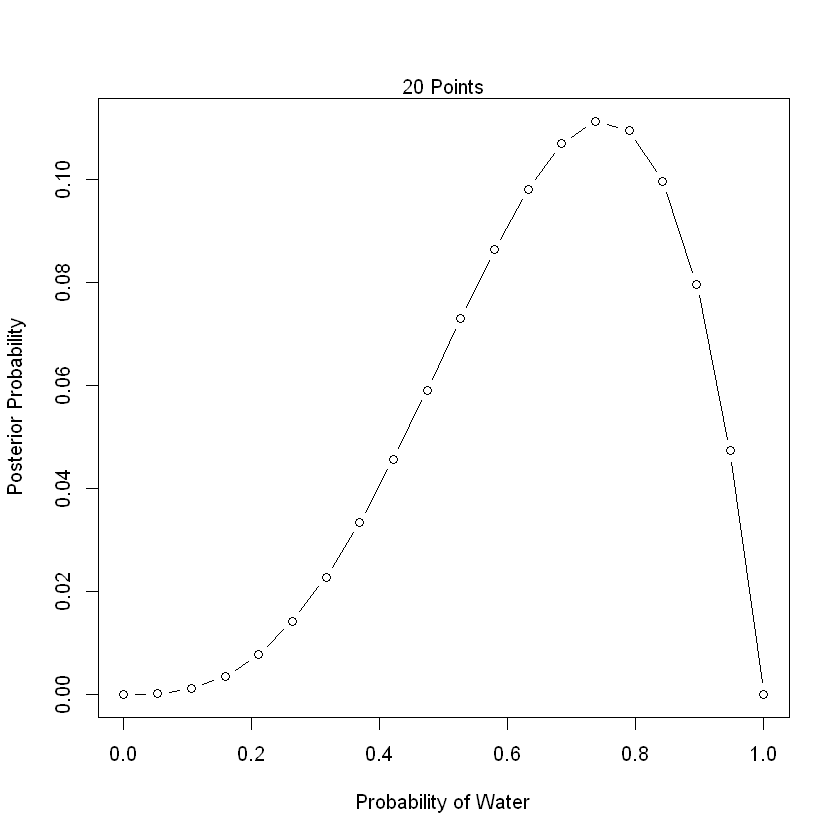

In [15]:
w <- 3; n <- 4
posterior <- compute_posterior(w=w, n=n, prior=prior)
plot_posterior(x=p_grid, y=posterior)

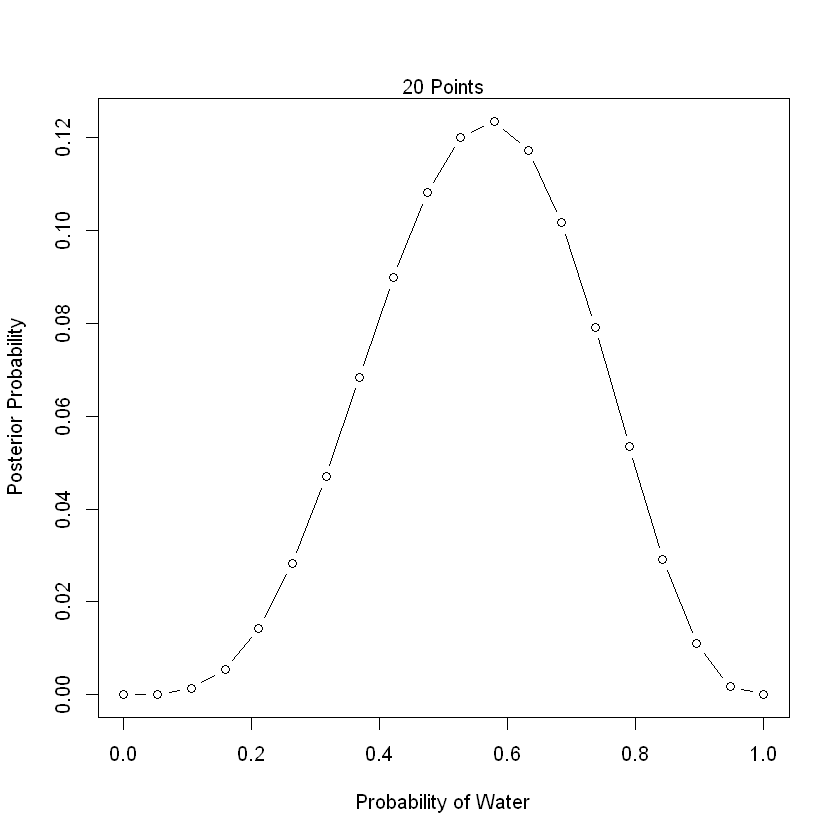

In [123]:
w <- 4; n <- 7
posterior <- compute_posterior(w=w, n=n, prior=prior)
plot_posterior(x=p_grid, y=posterior)

**<font color = 'purple'>2M2. Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above</font>**.

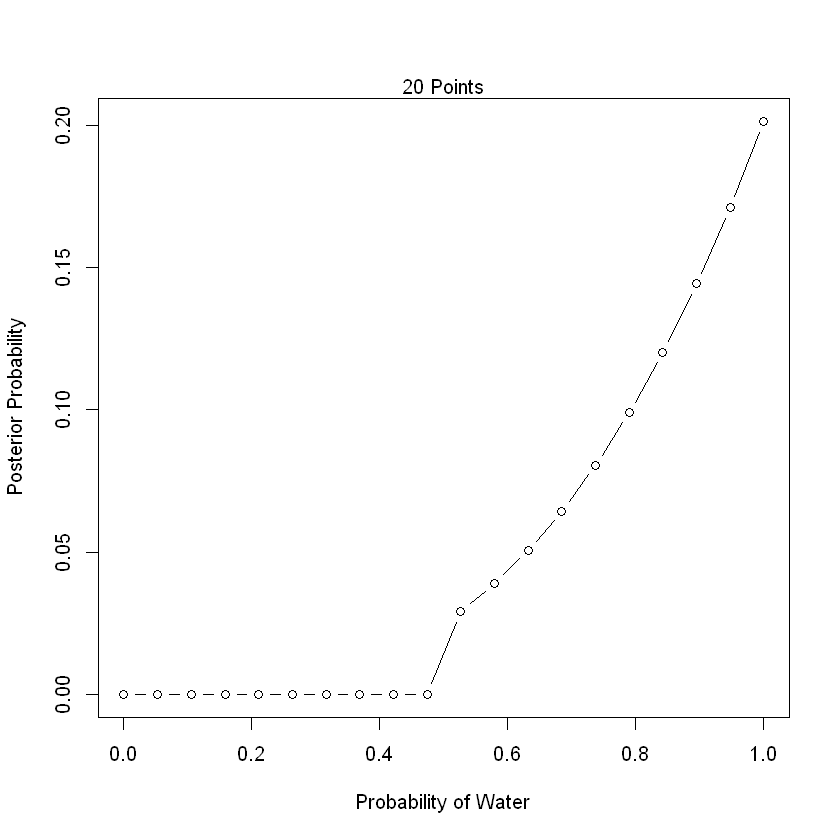

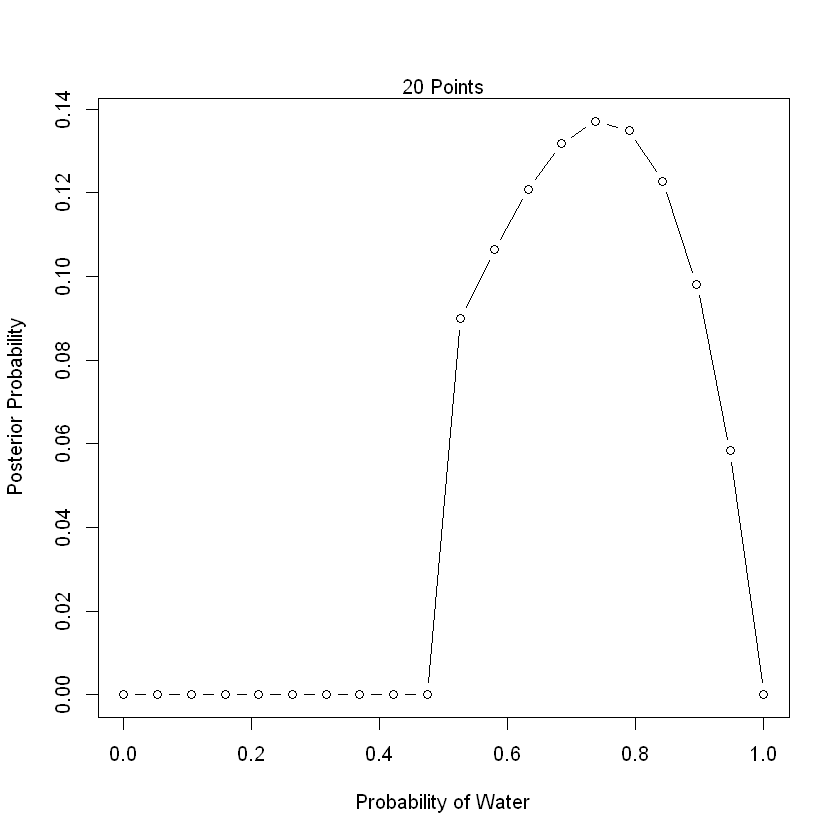

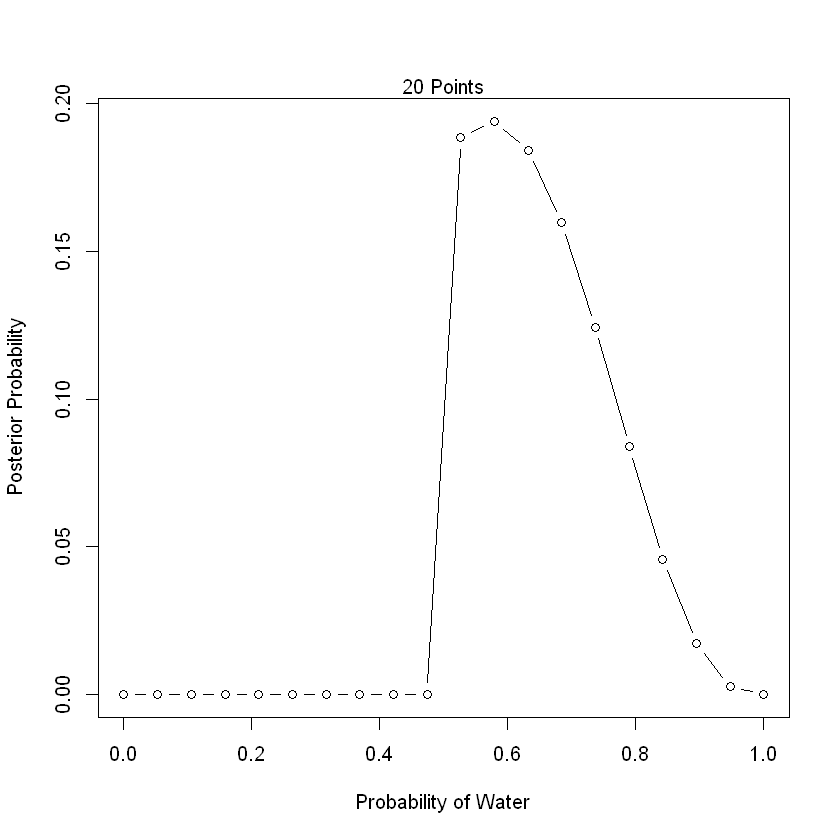

In [144]:
# prior <- ifelse(test = p_grid < .5, yes = 0, no = 1)
# plot_posterior(x=p_grid, y=prior)


p_grid <- seq(from=0, to=1, length.out=20)
prior <- ifelse(p_grid<0.5, 0, 1)

w <- 3; n <- 3
posterior <- compute_posterior(w=w, n=n, prior=prior)
plot_posterior(x=p_grid, y=posterior)

w <- 3; n <- 4
posterior <- compute_posterior(w=w, n=n, prior=prior)
plot_posterior(x=p_grid, y=posterior)

w <- 4; n <- 7
posterior <- compute_posterior(w=w, n=n, prior=prior)
plot_posterior(x=p_grid, y=posterior)

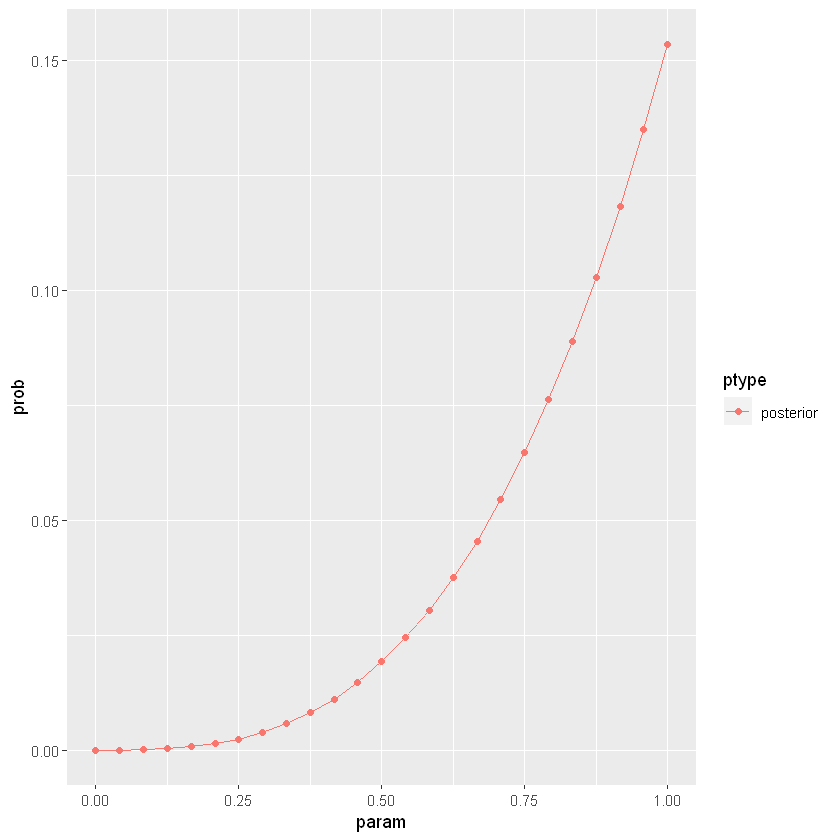

In [138]:
## Medium #### alternate soln
# 2M1, 2M2
data <- c('W','W', 'W')
# data <- c('W','W', 'W', 'L')
# data <- c('L','W', 'W', 'L', 'W', 'W', 'W')

n = length(data)
w = sum(data=='W')

p_grid <- seq(0, 1, length.out = 25)
ng = length(p_grid)

prior <- rep(1, ng)               # 2M1
# prior <- ifelse(p_grid<0.5, 0, 1) # 2M2

likelihood <- dbinom(w, n, p_grid)

posterior <- likelihood * prior
posterior <- posterior / sum(posterior)

df <- data.frame(param=c(p_grid,p_grid),
                 prob=c(prior,posterior),
                 ptype=c(rep('prior',ng), rep('posterior',ng)))

x <- ggplot(df %>% filter(ptype=='posterior'), 
            aes(x=param, y=prob, group=ptype, color=ptype)) + 
    geom_line() + geom_point()
print(x)

<font color = 'purple'>2M3. Suppose there are two globes, one for Earth and one for Mars. 
    
* The Earth globe is 70% covered in water. 
* The Mars globe is 100% land. 
* Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observation. Assume that each globe was equally likely to be tossed. 

**Show that the posterior probability that the globe was the Earth, conditional on seeing “land” (Pr(Earth|land)), is 0.23**</font>.

$posterior = \frac{likelihood * Prior}{Average Likelihood)}$

$p(Earth|Land) = \frac{P(Land|Earth)*P(Earth)}{(P(Land|Earth)*P(Earth)+P(Land|Mars)*P(Mars))}$

In [153]:
# 2M3
# p(Earth|Land) = P(Land|Earth)*P(Earth)/(P(Land|Earth)*P(Earth)+P(Land|Mars)*P(Mars))
p_e_l           = (1-0.7)*0.5 / ((1-0.7)*0.5 + 1.*0.5)
print(p_e_l)

## 2M3
prior <- c(.5, .5)
likelihood <- c(.3, 1)
unstandardized.posterior <- prior * likelihood
posterior <- unstandardized.posterior / sum(unstandardized.posterior)
round( posterior[1], 2) == .23

[1] 0.2307692


[1] TRUE

In [145]:
prior <- c(.5, .5)
likelihood <- c(.3, 1)
unstandardized.posterior <- prior * likelihood
posterior <- unstandardized.posterior / sum(unstandardized.posterior)
round( posterior[1], 2) == .23


[1] TRUE

<font color = 'purple'>**2M4. Suppose you have a deck with only three cards.**
    
  * Each card has two sides, and each side is eitherblack or white. 
  * One card has two black sides. 
  * The second card has one black and one white side. 
  * The third card has two white sides. 
  * Now suppose all three cards are placed in a bag and shuffled. 
  * Someone reaches into the bag and pulls out a card and places it flat on a table. 
  * A black side is shown facing up, but you don’t know the color of the side facing down. 
  
**Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This means counting upthe ways that each card could produce the observed data (a black side facing up
on the table)**</font>.

In [159]:
card.bb.likelihood  <- 2
card.wb.likelihood  <- 1
card.ww.likelihood  <- 0
likelihood <- c(card.bb.likelihood, card.wb.likelihood, card.ww.likelihood)
prior <- c(1,1,1)
unstd.posterior <- prior * likelihood
posterior <- unstd.posterior/sum(unstd.posterior)
posterior[1]




[1] 0.6666667

In [156]:
# 2M4
# BB WB WW
# By probability formula
# P(Down=B|Upper=B) = P(Down=B,Upper=B) / P(Upper=B) = P(BB) / (P(BB) + P(WB)*P(Upper=B|WB)) =  
#    = (1/3) / (1/3 + 1/3 * 1/2) = 2/3
# by counting
card.bb.likelihood <- 2
card.wb.likelihood <- 1
card.ww.likelihood <- 0
likelihood <- c(card.bb.likelihood, card.wb.likelihood, card.ww.likelihood)
prior <- c(1,1,1)
posterior <- prior * likelihood
posterior <- posterior/sum(posterior)
posterior[1] == 2/3


[1] TRUE

In [ ]:
## 2M4
card.1.likelihood <- 2
card.2.likelihood <- 1
card.3.likelihood <- 0
likelihood <- c(card.1.likelihood, card.2.likelihood, card.3.likelihood)
prior <- rep(x = 1, length = length(likelihood))

unstandardized.posterior <- prior * likelihood
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

# the probability the other size is black is equal to the probability that we've drawn card 1
posterior[1] == 2/3

**<font color = 'purple'>2M5. Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is
drawn from the bag and a black side appears face up. Again calculate the probability that the other
side is black</font>**.

In [164]:
card.bb.likelihood <- 2
card.wb.likelihood <- 1
card.ww.likelihood <- 0
card.bb.likelihood <- 2

likelihood <- c(card.bb.likelihood, card.wb.likelihood, card.ww.likelihood, card.bb.likelihood)
prior <- c(1,1,1,1)

unstandardized.posterior <- prior*likelihood
posterior <- unstandardized.posterior/sum(unstandardized.posterior)

posterior[1] + posterior[4]

[1] 0.8

<font color = 'purple'>2M6. Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it’s less likely that a card with black sides is pulled from the bag. 

* So again assume there are three cards: B/B, B/W, and W/W. 
* After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. 
* Again suppose that a card is pulled and a black side appears face up. 

**Show that the probability the other side is black is now 0.5. Use the counting method, as before**</font>.

In [168]:
card.bb.likelihood <- 2
card.wb.likelihood <- 1
card.ww.likelihood <- 0

likelihood <- c(card.bb.likelihood, card.wb.likelihood, card.ww.likelihood)
prior <- c(1,2,3)
unstandardized.posterior <- prior*likelihood

posterior   <- unstandardized.posterior/sum(unstandardized.posterior)
posterior[1]


[1] 0.5

<font color = 'purple'>2M7. Assume again the original card problem, with a single card showing a black side face up. 
    
* Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. 

**Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75.**
Use the counting method, if you can. Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card</font>.

In [175]:
# ways to produce 2 cards of each color
card.bb.likelihood <- 2*3 #2 blacks choices, for each there are 3 options = ww->2 + wb->1
card.wb.likelihood <- 1*2 
card.ww.likelihood <- 0

likelihood <- c(card.bb.likelihood, card.wb.likelihood, card.ww.likelihood)
prior <- c(1,1,1)
unstandardized.posterior <- prior*likelihood

posterior   <- unstandardized.posterior/sum(unstandardized.posterior)
posterior[1]


[1] 0.75

In [180]:
card.1.2.likelihood <- 2
card.2.1.likelihood <- 0
card.1.3.likelihood <- 4
card.3.1.likelihood <- 0
card.2.3.likelihood <- 2
card.3.2.likelihood <- 0

likelihood <- c(card.1.2.likelihood, card.2.1.likelihood, card.1.3.likelihood, card.3.1.likelihood, card.2.3.likelihood, card.3.2.likelihood)
prior <- rep(x = 1, length = length(likelihood))
unstandardized.posterior <- prior * likelihood
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

# the probability that the other side of the first card is black is equal to the probability that the first card is card 1,
# which equals the probability that the sequence we've chosen is either (1, 2), or (1, 3)
posterior[1] + posterior[3] == .75

[1] TRUE

### Hard

<font color = 'purple'>2H1. Suppose there are two species of panda bear. 
* Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. 
* They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research. 

**Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins**</font>?

In [194]:
panda.A <- .10
panda.B <- .20

prior <- c(1,1)
likelihood <- c(panda.A, panda.B)
unstandardized.posterior <- prior*likelihood
posterior <- unstandardized.posterior / sum(unstandardized.posterior )

sum(posterior * likelihood)



[1] 0.1666667

[1] 0.3333333 0.6666667

In [182]:
## Hard ####
# 2H1
# p(twins) = p(species=A)*p(twins|A)+p(species=B)*p(twins|B)
# before first breeding P(species=A)=p(species=B)=0.5
# to get answer for the second round we need to calculate new p(A) and p(B)
# it's posterior of first breeding that becomes prior for the second one
# p(tweens_2|tweens_1) = p(species=A|tweens_1)*p(twins|A)+p(species=B|tweens_1)*p(twins|B)
p_twins_A <- 0.1
p_twins_B <- 0.2
likelihood <- c(p_twins_A, p_twins_B)
prior <- c(1, 1)
posterior <- prior * likelihood
posterior <- posterior/sum(posterior)

# result
sum(posterior*likelihood)
# --------------------------------------------------------------------------
# find posterior for plausibility of each pandas species following the first birth of twins
species.1.likelihood <- .1
species.2.likelihood <- .2
likelihood <- c(species.1.likelihood, species.2.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

# probability next birth is set of twins
posterior[1] * .1 + posterior[2] * .2

[1] 0.1666667

[1] 0.1666667

<font color = 'purple'>2H2. Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have observed only the first birth and that it was twins</font>.

In [184]:
panda.A <- .10
panda.B <- .20

prior <- c(1,1)
likelihood <- c(panda.A, panda.B)
unstandardized.posterior <- prior*likelihood
posterior <- unstandardized.posterior / sum(unstandardized.posterior )

posterior[1]



[1] 0.3333333

In [186]:
## 2H2
species.1.likelihood <- .1
species.2.likelihood <- .2
likelihood <- c(species.1.likelihood, species.2.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

# probability pandas is from species 1
posterior[1]


# 2H2
# vanila Bayes rule
p_twins_A <- 0.1
p_twins_B <- 0.2
likelihood <- c(p_twins_A, p_twins_B)
prior <- c(1, 1)
posterior <- prior * likelihood
posterior <- posterior/sum(posterior)

posterior[1] #0.33

[1] 0.3333333

[1] 0.3333333

<font color = 'purple'>2H3. Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A</font>.

In [197]:
# single infant likelihood for round 2
panda.A <- 0.1 * .90
panda.B <- 0.2 * .80

prior <- c(1,1)
likelihood <- c(panda.A, panda.B)
unstandardized.posterior <- prior * likelihood
posterior <- unstandardized.posterior/sum(unstandardized.posterior)
posterior[1]

[1] 0.36

In [210]:
### 2H3

species.1.likelihood <- .1 * (1 - .1)
species.2.likelihood <- .2 * (1 - .2)
likelihood <- c(species.1.likelihood, species.2.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior <- unstandardized.posterior / sum(unstandardized.posterior)

# probability pandas is from species 1
posterior[1]

[1] 0.36

<font color = 'purple'>2H4. Acommon boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of the data, even if the data are of different types.

So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect. This is the information you have about the test:

* The probability it correctly identifies a species A panda is 0.8.
* The probability it correctly identifies a species B panda is 0.65.

The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculation, now using the birth data as well</font>.

<font color = 'purple'>**PART 1** without birth information</font>
<hr>

In [217]:
# P(test=A | species=A) = 0.80
# P(test=B | species=A) = 0.20
# P(test=B | species=B) = 0.65
# P(test=A | species=B) = 0.35

# p(t=A)     = P(t=A|s=A)*p(s=A) + p(t=A|s=B)*p(s=B)
# P(s=A|t=A) = (P(t=A|s=A)*p(s=A))/p(t=A)
# P(s=A|t=A) = (0.8*0.5)/(0.80*0.5+0.35*0.5)

posterior <- (0.8*0.5)/(0.80*0.5+0.35*0.5)
posterior 


[1] 0.6956522

In [221]:
### alternate soln

# without birth information
species.A.likelihood <- .8        #  <- P(test=A | species=A) 
species.B.likelihood <- 1 - .65   #  <-  P(test=A | species=B)

likelihood <- c(species.A.likelihood, species.B.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior.vtest <- unstandardized.posterior / sum(unstandardized.posterior)

# probability pandas is from species 1, given veterinarian test
posterior.vtest
posterior.vtest[1]

[1] 0.6956522 0.3043478

[1] 0.6956522

<font color = 'purple'>**PART 2** with birth information</font>
<hr>

In [213]:
species.A.likelihood <- .8*0.10
species.B.likelihood <- (1 - .65)*0.20
likelihood <- c(species.A.likelihood, species.B.likelihood)
prior <- c(1, 1)
unstandardized.posterior <- likelihood * prior
posterior<- unstandardized.posterior / sum(unstandardized.posterior)
posterior


[1] 0.5333333 0.4666667

In [220]:
species.A.likelihood <- 0.10
species.B.likelihood <- 0.20

prior <- posterior.vtest  # c(0.695652173913044, 0.304347826086957)

likelihood <- c(species.A.likelihood, species.B.likelihood)
unstandardized.posterior <- prior * likelihood
posterior <- unstandardized.posterior/sum(unstandardized.posterior)
posterior


[1] 0.5333333 0.4666667

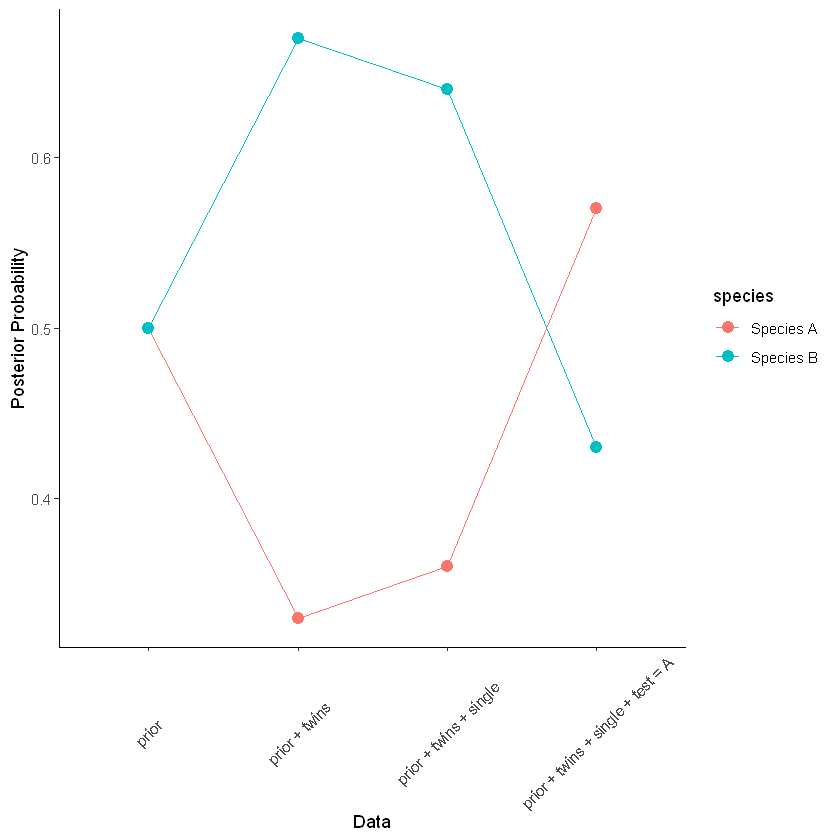

In [222]:
evidence = factor(rep(c("prior", 
                        "prior + twins", 
                        "prior + twins + single", 
                        "prior + twins + single + test = A"), 
               each = 2), 
               levels = c("prior", 
                        "prior + twins", 
                        "prior + twins + single", 
                        "prior + twins + single + test = A"))
species = rep(c("Species A", "Species B"), 4)
prob = c(0.5, 0.5, 0.33, 0.67, 0.36, 0.64, 0.57, 0.43)
change_df <- data.frame(species = species,
                        evidence = evidence,
                        prob = prob)
ggplot(change_df, aes(x = evidence, 
                      y = prob, 
                      colour = species, 
                      group = species)) +
  geom_line() +
  geom_point(size = 3) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) +
  xlab("Data") +
  ylab("Posterior Probability")


# HOMEWORK WEEK 1

Lecture 1: The Golem of Prague

- [Video](https://www.youtube.com/watch?v=4WVelCswXo4)
- [Slides](https://speakerdeck.com/rmcelreath/l01-statistical-rethinking-winter-2019)

Lecture 2: Garden of Forking Data

- [Video](https://www.youtube.com/watch?v=XoVtOAN0htU)
- [Slides](https://speakerdeck.com/rmcelreath/l02-statistical-rethinking-winter-2019)

[Proposed problems](https://github.com/gbosquechacon/statrethinking_winter2019/blob/master/homework/week01.pdf) and [solutions in R](https://github.com/gbosquechacon/statrethinking_winter2019/blob/master/homework/week01_solutions.pdf) for the exercises of the week.

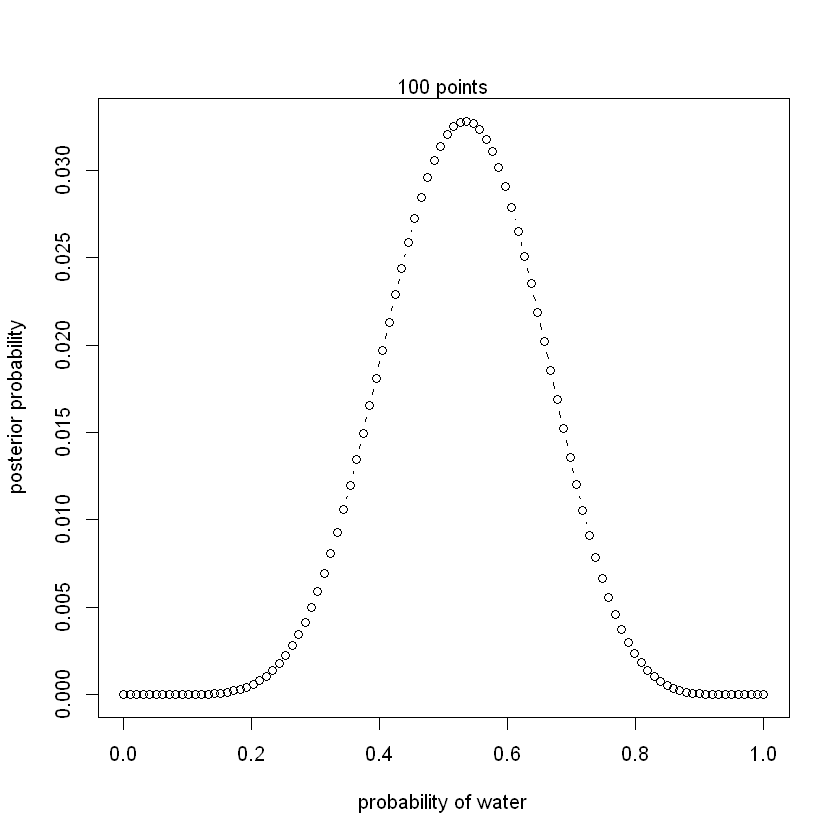

In [11]:
# Question 1
# Suppose the globe tossing data had turned out to be 8 water in 15 
# tosses. Construct the posterior distribution, using grid 
# approximation. Use the same flat prior as before.

intervals = 100
 # define grid
p_grid <- seq( from=0 , to=1 , length.out=intervals )

# define prior
prior <- rep( 1 , intervals )                    # flat prior
# prior <- ifelse( p_grid < 0.5 , 0 , 1 ) # step prior
# prior <- exp( -5*abs( p_grid - 0.5 ) )  # peaked prior

# compute likelihood at each value in grid
likelihood <- dbinom( 8 , size=15 , prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

plot( p_grid , posterior , type="b" ,
     xlab="probability of water" , ylab="posterior probability" )

mtext( "100 points" )